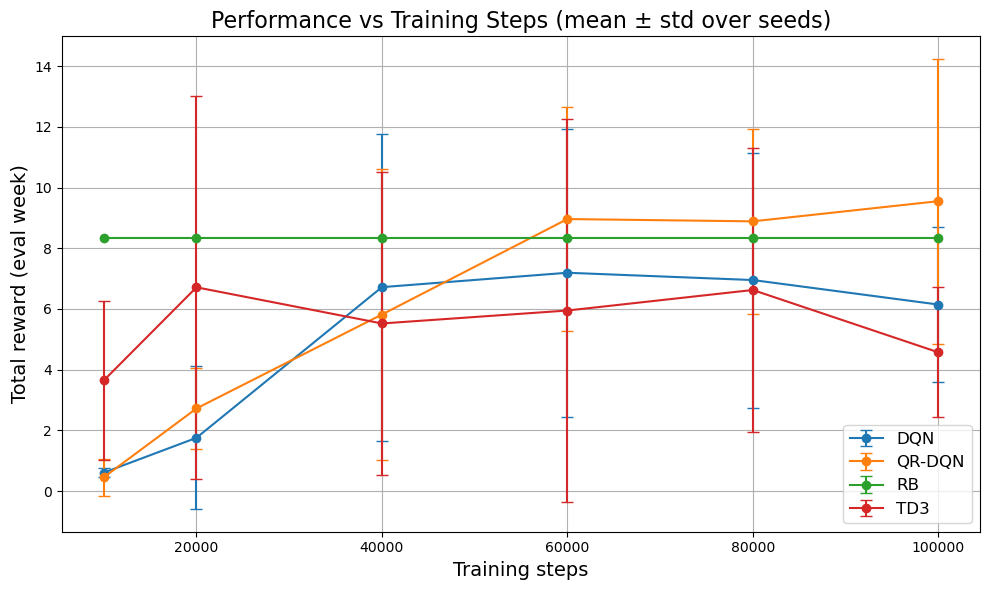

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

df = pd.read_csv("learning_steps_records.csv")

summary = (
    df.groupby(["agent", "training_steps"])["total_reward"]
      .agg(["mean", "std"])
      .reset_index()
)

for agent_name in summary["agent"].unique():
    sub = summary[summary["agent"] == agent_name]
    plt.errorbar(
        sub["training_steps"],
        sub["mean"],
        yerr=sub["std"],
        fmt="o-",
        capsize=4,
        label=agent_name,
    )

plt.xlabel("Training steps", fontsize=14)
plt.ylabel("Total reward (eval week)", fontsize=14)
plt.title("Performance vs Training Steps (mean ± std over seeds)", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()